In [104]:
#Importing libraries
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
#from IPython.display import display
from matplotlib.dates import MonthLocator, DateFormatter
import plotly.express as px
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy.stats import pearsonr



In [105]:
#Reading the main data file
df = pd.read_csv('./mpox cases by country as of 18 July 2023.csv', )


In [106]:
#Inspecting the data
df.head()

,country,iso3,who_region,date,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,Benin,BEN,African Region,2022-06-24,3,0,0,3,0,0
1,Benin,BEN,African Region,2022-07-01,3,0,0,0,0,0
2,Benin,BEN,African Region,2022-07-08,3,0,0,0,0,0
3,Benin,BEN,African Region,2022-07-15,3,0,0,0,0,0
4,Benin,BEN,African Region,2022-07-22,3,0,0,0,0,0


In [7]:
#Correcting the date value
df['date'] = pd.to_datetime(df['date'])
df.dtypes

country                          object
iso3                             object
who_region                       object
date                     datetime64[ns]
total_confirmed_cases             int64
total_probable_cases              int64
total_deaths                      int64
new_confirmed_cases               int64
new_probable_cases                int64
new_deaths                        int64
dtype: object

In [8]:
df

,country,iso3,who_region,date,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,Benin,BEN,African Region,2022-06-24,3,0,0,3,0,0
1,Benin,BEN,African Region,2022-07-01,3,0,0,0,0,0
2,Benin,BEN,African Region,2022-07-08,3,0,0,0,0,0
3,Benin,BEN,African Region,2022-07-15,3,0,0,0,0,0
4,Benin,BEN,African Region,2022-07-22,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9039,Singapore,SGP,Western Pacific Region,2023-04-14,23,0,0,1,0,0
9040,Singapore,SGP,Western Pacific Region,2023-05-05,25,0,0,2,0,0
9041,Viet Nam,VNM,Western Pacific Region,2022-10-03,1,0,0,1,0,0
9042,Viet Nam,VNM,Western Pacific Region,2022-10-19,2,0,0,1,0,0


In [9]:
df1 = df

# KEY FIGURES - Data are being constantly updated - 

## Total Confirmed cases

In [11]:
total_confirmed_cases = df1['new_confirmed_cases'].sum()
total_confirmed_cases

88503

## Total deaths

In [12]:
total_confirmed_deaths = df1['new_deaths'].sum()
total_confirmed_deaths

150

## Countries infected


In [13]:
total_confirmed_countries = df['country'].nunique()
total_confirmed_countries


113

# Plotly Scatterplot presenting the W.H.O regions

In [109]:
#Checking for NEW cases on unique WHO regions for my scatterplot 
df1['who_region'].unique()

array(['African Region', 'Eastern Mediterranean Region',
       'European Region', 'Region of the Americas',
       'South-East Asia Region', 'Western Pacific Region'], dtype=object)

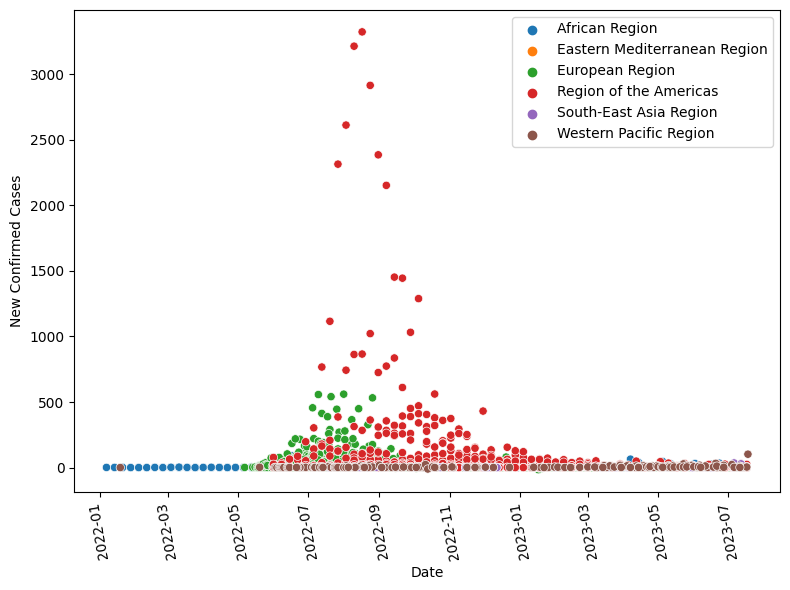

In [110]:
#Scatterplot (WHO Regions)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='date', y='new_confirmed_cases', hue='who_region')

plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.xticks(rotation=100)
plt.tight_layout()

plt.legend()
plt.show()

In [117]:
#Data file with the sum of mpox cases & deaths
df_world = pd.read_csv('./mpox cases and deaths by WHO region.csv')
df_world


,WHO_Region,Total_Confirmed_Cases,Total Probable Cases,Total_Deaths,Cases in the last 3 weeks,Cases in the preceding 3 weeks,3-Week % change in cases
0,Region of the Americas,59690,1087,122,70,69,0.014
1,European Region,25960,0,7,20,10,1.000
2,African Region,1802,0,21,0,70,NaN
3,Western Pacific Region,911,0,0,177,94,0.883
4,South-East Asia Region,147,0,1,63,16,2.938
5,Eastern Mediterranean Region,90,0,1,0,0,NaN


## Total cases / WHO Region 

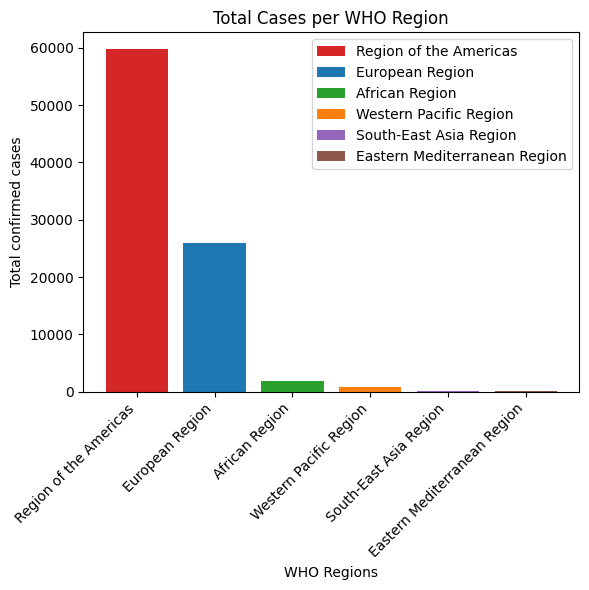

In [122]:
regions = df_world['WHO_Region']
total_confirmed_cases = df_world['Total_Confirmed_Cases']

# Sorting total cases in descending order
sorted_data = sorted(zip(regions, total_confirmed_cases), key=lambda x: x[1], reverse=True)
regions, total_confirmed_cases = zip(*sorted_data)
colors = ['tab:red','tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']
plt.figure(figsize=(6, 6))
bars = plt.bar(regions, total_confirmed_cases, color=colors)

plt.xlabel('WHO Regions')
plt.ylabel('Total confirmed cases')
plt.title('Total Cases per WHO Region')
plt.xticks(rotation=45, ha='right')
plt.legend(bars, regions)

plt.tight_layout()
plt.show()


## Total deaths / WHO region

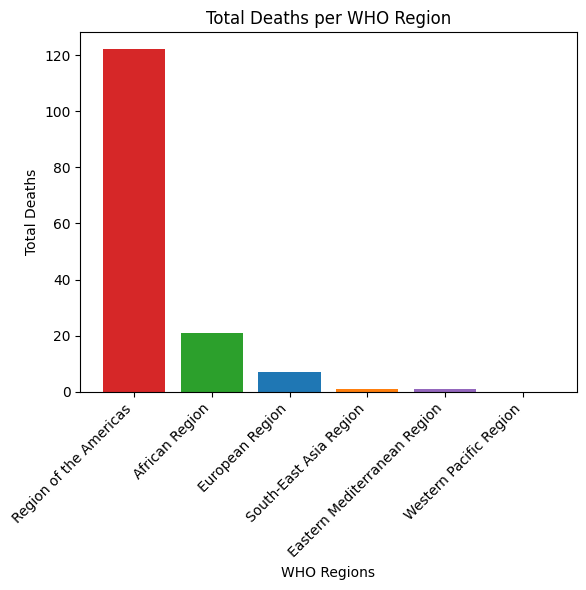

In [119]:
df_world = pd.read_csv('./mpox cases and deaths by WHO region.csv')
regions = df_world['WHO_Region']
total_deaths = df_world['Total_Deaths']
sorted_data = sorted(zip(regions, total_deaths), key=lambda x: x[1], reverse=True)
regions, total_deaths = zip(*sorted_data)
colors = ['tab:red','tab:green', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown']

plt.figure(figsize=(6, 6))
bars = plt.bar(regions, total_deaths, color=colors)
plt.xlabel('WHO Regions')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per WHO Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## Using filled dates for the spread map

In [124]:
#Filled dates for visualisation*
filled_dates = pd.read_csv('./filled_data.csv')
filled_dates

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,2022-01-07,ABW,Aruba,Region of the Americas,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-14,ABW,Aruba,Region of the Americas,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-19,ABW,Aruba,Region of the Americas,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-21,ABW,Aruba,Region of the Americas,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-28,ABW,Aruba,Region of the Americas,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
37285,2023-07-11,ZAF,South Africa,African Region,5.0,0.0,0.0,0.0,0.0,0.0
37286,2023-07-12,ZAF,South Africa,African Region,5.0,0.0,0.0,0.0,0.0,0.0
37287,2023-07-14,ZAF,South Africa,African Region,5.0,0.0,0.0,0.0,0.0,0.0
37288,2023-07-17,ZAF,South Africa,African Region,5.0,0.0,0.0,0.0,0.0,0.0


# Animated cloropleth map

In [ ]:
filled_dates['total_confirmed_cases'].mode = filled_dates.groupby ('who_region')['total_confirmed_cases'].transform('cumsum')
grouped_data = filled_dates.sort_values('date', ascending = True)

fig = px.choropleth(grouped_data, locations='iso3', color='total_confirmed_cases', hover_name='who_region',
                    animation_frame='date', color_continuous_scale='OrRd', range_color=[0,2000], #grouped_data['total_confirmed_cases'].max()],
                    title='Animated Choropleth Map')

fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate',
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate',
            },
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top',
    }],
    sliders=[{
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Date:',
            'visible': True,
            'xanchor': 'right',
        },
        'transition': {'duration': 10, 'easing': 'cubic-in-out'},
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
    }],
)

fig.show()

# Patients' Symptomatology


In [22]:
df_symptoms = pd.read_csv('./mpox symptoms.csv')
df_symptoms = df_symptoms.sort_values(by='Percent', ascending=True)

### Plotly Symptoms bargraph

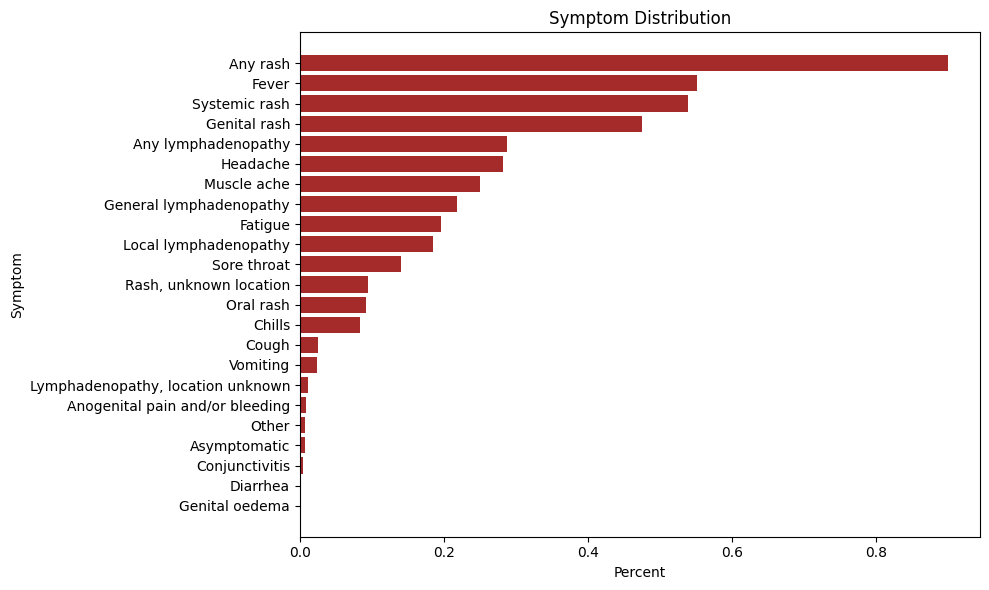

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(df_symptoms['Symptom'], df_symptoms['Percent'], color='brown')
plt.xlabel('Percent')
plt.ylabel('Symptom')
plt.title('Symptom Distribution')
plt.tight_layout()

plt.show()

# Cases by gender

In [24]:
case_gender = pd.read_csv('./mpox cases age-sex pyramid.csv')
case_gender


,sex,age_group,cases
0,Male,0-9,278
1,Male,10-17,379
2,Male,18-29,21308
3,Male,30-39,32371
4,Male,40-49,16528
5,Male,50-59,6014
6,Male,60-69,1238
7,Male,70-79,143
8,Male,80+,18
9,Female,0-9,273


# Visualising the cases by gender

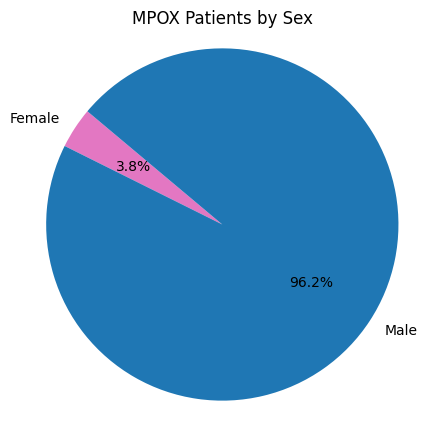

In [28]:
plt.figure(figsize=(5, 5))
age_group_counts = case_gender.groupby('sex')['cases'].sum()
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('MPOX Patients by Sex')
plt.axis('equal')
colors = ['tab:pink', 'tab:blue']

plt.show()

# Cases by age, group and gender

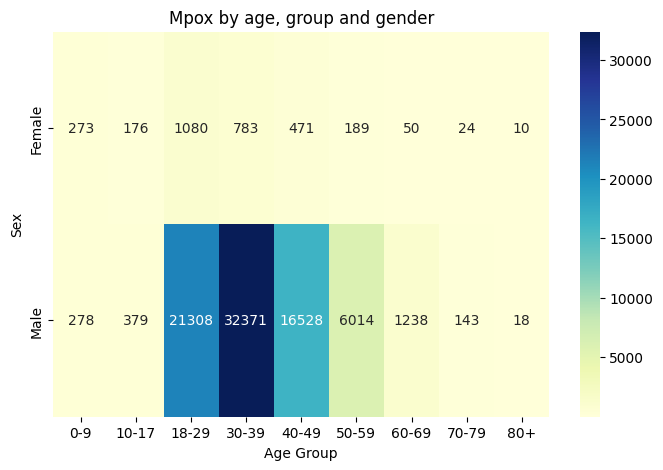

In [29]:
age_profiles = pd.read_csv('./mpox cases age-sex pyramid.csv')
age_profiles
pivot_table = age_profiles.pivot_table(index='sex', columns='age_group', values='cases', aggfunc='sum')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Mpox by age, group and gender')
plt.xlabel('Age Group')
plt.ylabel('Sex')
plt.show()


# Case profiles

In [30]:
case_profiles = pd.read_csv('./mpox case profiles.csv')
case_profiles


,Profile,Yes,No,Unknown or\nMissing Value,Yes_pct,No_pct
0,Men who have sex with men,26111,4920,53390,0.841,0.159
1,HIV-Positive,16665,15396,52360,0.520,0.480
2,Health worker,1245,26811,56365,0.044,0.956
3,Travel History,3635,19345,61441,0.158,0.842
4,Sexual Transmission,16560,3609,64252,0.821,0.179
5,Hospitalised,4311,44521,35589,0.088,0.912
6,ICU,50,14419,69952,0.003,0.997
7,Died,120,53305,30996,0.002,0.998


## Visualising the profiles of patients

/tmp/ipykernel_9002/3085154997.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



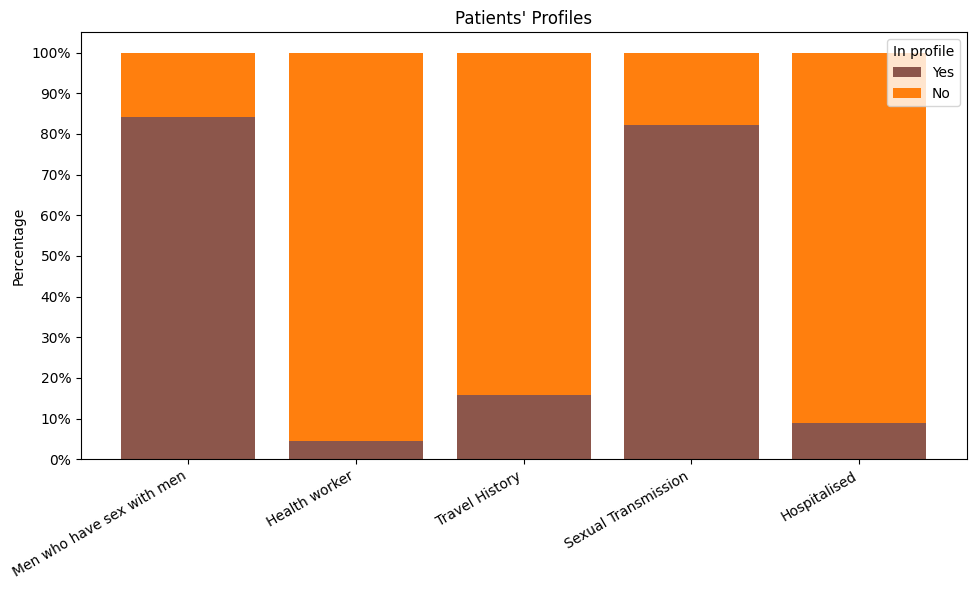

In [31]:
# Profiles to ignore
profiles_to_ignore = ['HIV-Positive', 'ICU', 'Died']
case_profiles = case_profiles[~case_profiles['Profile'].isin(profiles_to_ignore)]

# figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# 'No' values for stacked bar chart
case_profiles['No_pct_stacked'] = 100 - (case_profiles['Yes_pct'] * 100)
bar_width = 0.4

ax.bar(case_profiles['Profile'], case_profiles['Yes_pct'] * 100, label='Yes', color='tab:brown')
ax.bar(case_profiles['Profile'], case_profiles['No_pct_stacked'], bottom=case_profiles['Yes_pct'] * 100, label='No', color='tab:orange')

# y-axis ticks and labels
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels([f"{i}%" for i in range(0, 101, 10)])
ax.set_title("Patients' Profiles")
ax.set_ylabel("Percentage")
ax.legend(title="In profile")

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


### Reading the file about transmission type and the way of exposure to the virus

In [32]:
df_transmission = pd.read_csv('./mpox cases by transmission type.csv')
df_exposure = pd.read_csv('./mpox cases by exposure type.csv')

In [33]:
df_transmission 

,transmission_type,cases
0,Sexual encounter,16562
1,Person-to-person,2691
2,Other,424
3,Contact with contaiminated material,363
4,Healthcare-associated,104
5,Animal to human,14
6,Occupational exposure (lab),9
7,Mother-to-child at pregnancy or birth,2
8,"Parenteral transmission (transfusion, IV drug ...",2


## Visualising with plotly bar graph the transmission type

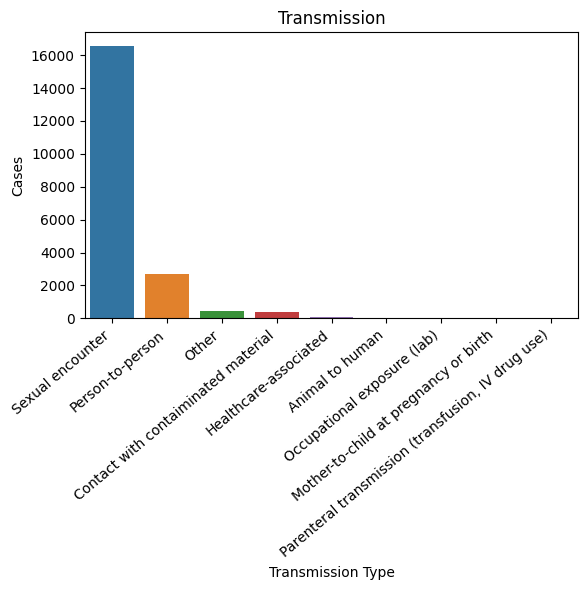

In [34]:
plt.figure(figsize=(6, 6))
sns.barplot(x='transmission_type', y='cases', data=df_transmission )
plt.xticks(rotation=40, ha='right')
plt.xlabel('Transmission Type')
plt.ylabel('Cases')
plt.title('Transmission')
plt.tight_layout()
plt.show()

## Visualising the type of exposure

In [132]:
df_exposure

,exposure_type,cases
0,Party setting with sexual contact,4021
1,Household,742
2,Other,620
3,Large event with sexual contact,248
4,"Large event, no sexual contact",221
5,"Party setting, no sexual contact",158
6,Workplace,64
7,Healthcare,13
8,School/nursery,3


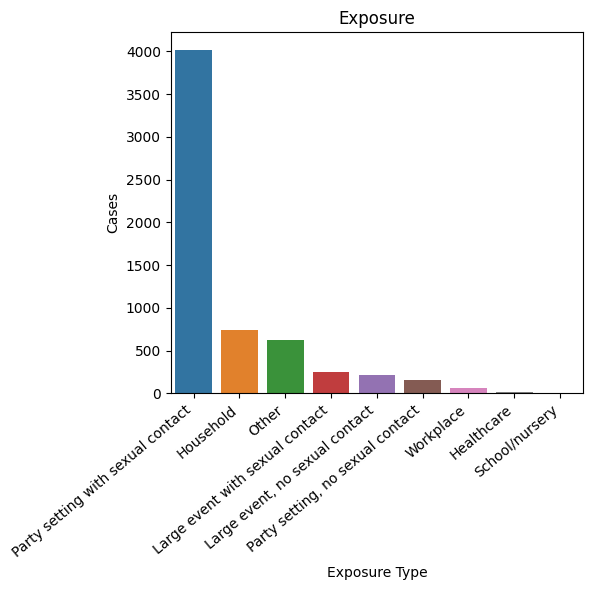

In [133]:
plt.figure(figsize=(6, 6))
sns.barplot(x='exposure_type', y='cases', data=df_exposure )
plt.xticks(rotation=40, ha='right')
plt.xlabel('Exposure Type')
plt.ylabel('Cases')
plt.title('Exposure')
plt.tight_layout()
plt.show()

# Focusing on Europe

In [38]:
df = pd.read_csv('./filled_data.csv')
df.dtypes
df['date'] = pd.to_datetime(df['date'])

#creating EU dataframe and reseting the index
df_europe = df.loc[df['who_region'] == 'European Region']
df_europe = df_europe.reset_index(drop=True)
df_europe
# changing data type to datetime

df_europe.dtypes

date                     datetime64[ns]
iso3                             object
country                          object
who_region                       object
total_confirmed_cases           float64
total_probable_cases            float64
total_deaths                    float64
new_confirmed_cases             float64
new_probable_cases              float64
new_deaths                      float64
dtype: object

# Europe country widget

In [39]:
#Europe country widget

country_dropdown = widgets.Dropdown(options=df_europe['country'].unique(), description='Select Country:')

def widget_plot(selected_country):
    selected_data = df_europe[df_europe['country'] == selected_country]
    selected_data['daily_new_confirmed_cases'] = selected_data['new_confirmed_cases'].diff()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=selected_data, x='date', y='daily_new_confirmed_cases')
    plt.title(f'Confirmed Cases in {selected_country}')
    plt.xlabel('Date')
    plt.ylabel('Daily New Confirmed Cases')
    plt.xticks(rotation=45)
    plt.ylim(0, selected_data['new_confirmed_cases'].max() * 1.1)  # Set y-axis limits
    plt.tight_layout()
    plt.show()


# Display the interactive plot
widgets.interactive(widget_plot, selected_country=country_dropdown)

interactive(children=(Dropdown(description='Select Country:', options=('Andorra', 'Austria', 'Belgium', 'Bulga…

## Cases in Germany



In [40]:
#filtering germany data
df.loc[df['country'] == 'Germany']



,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
9900,2022-01-07,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
9901,2022-01-14,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
9902,2022-01-19,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
9903,2022-01-21,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
9904,2022-01-28,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10225,2023-07-11,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
10226,2023-07-12,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
10227,2023-07-14,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
10228,2023-07-17,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#creating germany dataframe and reseting the index
df_germany = df.loc[df['country'] == 'Germany']
df_germany = df_germany.reset_index(drop=True)
df_germany

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,2022-01-07,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-14,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-19,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-21,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-28,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
325,2023-07-11,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
326,2023-07-12,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
327,2023-07-14,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
328,2023-07-17,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0


# Portugal

In [49]:
#filtering Portugal
df.loc[df['country'] == 'Portugal']
df_portugal = df.loc[df['country'] == 'Portugal']
df_portugal = df_portugal.reset_index(drop=True)
# changing data type to datetime
df_portugal['date'] = pd.to_datetime(df_portugal['date'])
df_portugal.dtypes

date                     datetime64[ns]
iso3                             object
country                          object
who_region                       object
total_confirmed_cases           float64
total_probable_cases            float64
total_deaths                    float64
new_confirmed_cases             float64
new_probable_cases              float64
new_deaths                      float64
dtype: object

In [50]:
df_portugal

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,2022-01-07,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-14,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-19,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-21,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-28,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
325,2023-07-11,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0
326,2023-07-12,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0
327,2023-07-14,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0
328,2023-07-17,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0


# Google search keyword "monkeypox symptoms"

# google Germany

In [51]:
df_germany

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,2022-01-07,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-14,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-19,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-21,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-28,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
325,2023-07-11,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
326,2023-07-12,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
327,2023-07-14,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0
328,2023-07-17,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_germany.dtypes

date                     datetime64[ns]
iso3                             object
country                          object
who_region                       object
total_confirmed_cases           float64
total_probable_cases            float64
total_deaths                    float64
new_confirmed_cases             float64
new_probable_cases              float64
new_deaths                      float64
dtype: object

In [53]:
df_germany['date'].unique

<bound method Series.unique of 0     2022-01-07
1     2022-01-14
2     2022-01-19
3     2022-01-21
4     2022-01-28
         ...    
325   2023-07-11
326   2023-07-12
327   2023-07-14
328   2023-07-17
329   2023-07-18
Name: date, Length: 330, dtype: datetime64[ns]>

In [54]:
germany_google = pd.read_csv('./TrendsData/germany_google_graph.csv')

In [55]:
germany_google['Week']

0     2022-02-06
1     2022-02-13
2     2022-02-20
3     2022-02-27
4     2022-03-06
         ...    
62    2023-04-16
63    2023-04-23
64    2023-04-30
65    2023-05-07
66    2023-05-14
Name: Week, Length: 67, dtype: object

In [56]:
germany_google.dtypes

Week             object
Search Volume     int64
dtype: object

In [57]:
germany_google.rename(columns={'Week': 'date'}, inplace=True)

In [58]:
germany_google['date'] = pd.to_datetime(germany_google['date'])
germany_google.dtypes

date             datetime64[ns]
Search Volume             int64
dtype: object

In [59]:
merged_germany = df_germany.merge(germany_google, on='date', how='left')

In [60]:
merged_germany

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths,Search Volume
0,2022-01-07,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2022-01-14,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2022-01-19,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2022-01-21,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2022-01-28,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325,2023-07-11,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,NaN
326,2023-07-12,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,NaN
327,2023-07-14,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,NaN
328,2023-07-17,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,NaN


In [61]:
merged_germany.fillna(0, inplace=True)
merged_germany

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths,Search Volume
0,2022-01-07,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-14,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-19,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-21,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-28,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
325,2023-07-11,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,0.0
326,2023-07-12,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,0.0
327,2023-07-14,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,0.0
328,2023-07-17,DEU,Germany,European Region,3691.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
filtered_germany = merged_germany.loc[
    (merged_germany['date'].dt.month >= 2) & (merged_germany['date'].dt.month <= 12)& (merged_germany['date'].dt.year == 2022)]
filtered_germany

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths,Search Volume
5,2022-02-04,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-02-11,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-02-18,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-02-25,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-03-04,DEU,Germany,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
194,2022-12-21,DEU,Germany,European Region,3676.0,0.0,0.0,1.0,0.0,0.0,0.0
195,2022-12-23,DEU,Germany,European Region,3676.0,0.0,0.0,1.0,0.0,0.0,0.0
196,2022-12-27,DEU,Germany,European Region,3676.0,0.0,0.0,0.0,0.0,0.0,0.0
197,2022-12-28,DEU,Germany,European Region,3676.0,0.0,0.0,0.0,0.0,0.0,0.0


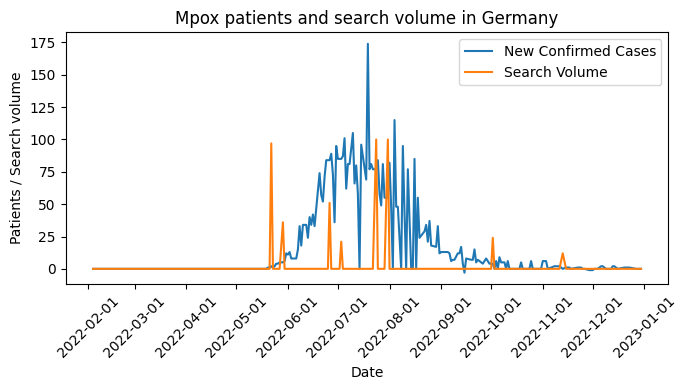

In [63]:
plt.figure(figsize=(7, 4))
plt.plot(filtered_germany['date'], filtered_germany['new_confirmed_cases'], label='New Confirmed Cases')
plt.plot(filtered_germany['date'], filtered_germany['Search Volume'], label='Search Volume')
plt.title('Mpox patients and search volume in Germany')
plt.xlabel('Date')
plt.ylabel('Patients / Search volume')
plt.legend()

# Format date labels on x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/tmp/ipykernel_9002/1632489234.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/tmp/ipykernel_9002/1632489234.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

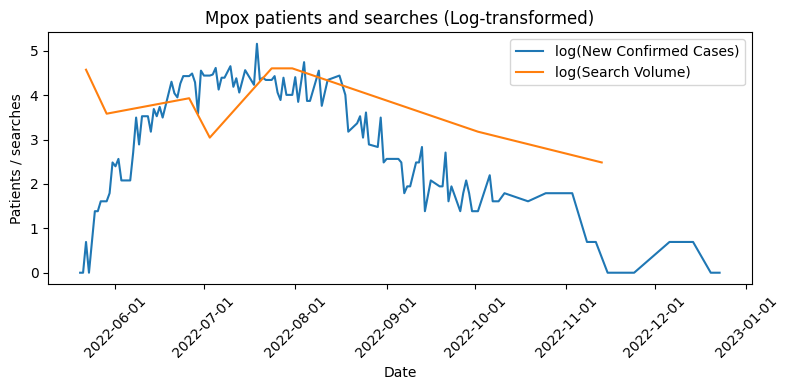

In [64]:
# Apply natural logarithmic transformation
filtered_germany['new_confirmed_cases_log'] = np.log(filtered_germany['new_confirmed_cases'])
filtered_germany['Search Volume_log'] = np.log(filtered_germany['Search Volume'])

# Create a line plot with logarithmic scale
plt.figure(figsize=(8, 4))
sns.lineplot(data=filtered_germany, x='date', y='new_confirmed_cases_log', label='log(New Confirmed Cases)')
sns.lineplot(data=filtered_germany, x='date', y='Search Volume_log', label='log(Search Volume)')
plt.title('Mpox patients and searches (Log-transformed)')
plt.xlabel('Date')
plt.ylabel('Patients / searches')

# Format date labels on x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend()
plt.tight_layout()
plt.show()

In [65]:
#natural logarithmic transformation
filtered_germany['new_confirmed_cases_log'] = np.log(filtered_germany['new_confirmed_cases'])
filtered_germany['Search Volume_log'] = np.log(filtered_germany['Search Volume'])


/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/tmp/ipykernel_9002/530984817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9002/530984817.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
X = merged_germany[['new_confirmed_cases']]  # Independent variable(s)
y = merged_germany['Search Volume']      # Dependent variable
X = sm.add_constant(X)     

In [67]:
print(model.summary())


NameError: name 'model' is not defined

In [68]:
filtered_germany['new_confirmed_cases_log'] = np.log(filtered_germany['new_confirmed_cases'])
filtered_germany['search Volume_log'] = np.log(filtered_germany['Search Volume'])
correlation = merged_germany['new_confirmed_cases'].corr(merged_germany['Search Volume'])
("Pearson Correlation Coefficient:", correlation)


/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/tmp/ipykernel_9002/1604943122.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9002/1604943122.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



('Pearson Correlation Coefficient:', 0.13523592268574794)

# Google Portugal

In [102]:
portugal_google = pd.read_csv('./TrendsData/portugal_google_graph.csv')

In [92]:
portugal_google.rename(columns={'Week': 'date'}, inplace=True)

In [93]:
portugal_google['date'] = pd.to_datetime(portugal_google['date'])
portugal_google.dtypes

date             datetime64[ns]
Search Volume             int64
dtype: object

In [94]:
df_portugal

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths
0,2022-01-07,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-14,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-19,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-21,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-28,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
325,2023-07-11,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0
326,2023-07-12,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0
327,2023-07-14,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0
328,2023-07-17,PRT,Portugal,European Region,965.0,0.0,1.0,0.0,0.0,0.0


In [95]:
merged_portugal = df_portugal.merge(portugal_google, on='date', how='left')

In [96]:
merged_portugal.fillna(0, inplace=True)

In [97]:
filtered_portugal = merged_portugal.loc[
    (merged_portugal['date'].dt.month >= 4) & (merged_portugal['date'].dt.month <= 9)& (merged_portugal['date'].dt.year == 2022)]
filtered_portugal

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths,Search Volume
13,2022-04-01,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2022-04-08,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2022-04-15,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2022-04-22,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2022-04-29,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
134,2022-09-26,PRT,Portugal,European Region,917.0,0.0,0.0,0.0,0.0,0.0,0.0
135,2022-09-27,PRT,Portugal,European Region,917.0,0.0,0.0,0.0,0.0,0.0,0.0
136,2022-09-28,PRT,Portugal,European Region,917.0,0.0,0.0,0.0,0.0,0.0,0.0
137,2022-09-29,PRT,Portugal,European Region,917.0,0.0,0.0,0.0,0.0,0.0,0.0


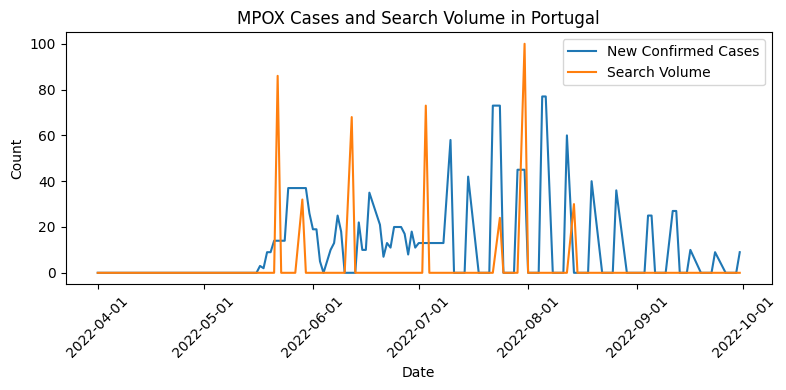

In [98]:
plt.figure(figsize=(8, 4))
plt.plot(filtered_portugal['date'], filtered_portugal['new_confirmed_cases'], label='New Confirmed Cases')
plt.plot(filtered_portugal['date'], filtered_portugal['Search Volume'], label='Search Volume')
plt.title('MPOX Cases and Search Volume in Portugal')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Format date labels on x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/tmp/ipykernel_9002/3569266119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dci-st152/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/tmp/ipykernel_9002/3569266119.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



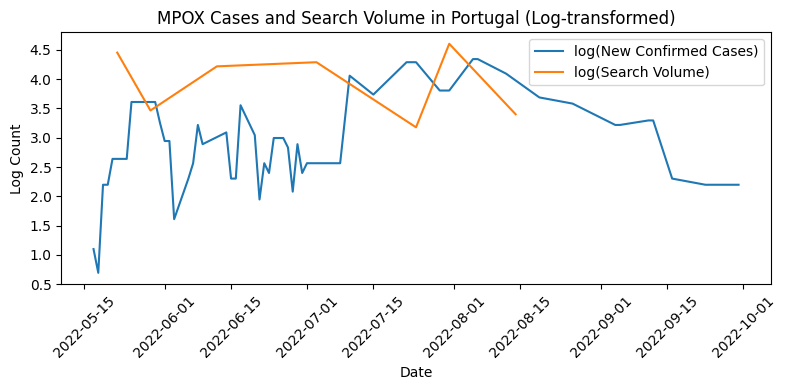

In [99]:
# Apply natural logarithmic transformation
filtered_portugal['new_confirmed_cases_log'] = np.log(filtered_portugal['new_confirmed_cases'])
filtered_portugal['Search Volume_log'] = np.log(filtered_portugal['Search Volume'])

# Create a line plot with logarithmic scale
plt.figure(figsize=(8, 4))
sns.lineplot(data=filtered_portugal, x='date', y='new_confirmed_cases_log', label='log(New Confirmed Cases)')
sns.lineplot(data=filtered_portugal, x='date', y='Search Volume_log', label='log(Search Volume)')
plt.title('MPOX Cases and Search Volume in Portugal (Log-transformed)')
plt.xlabel('Date')
plt.ylabel('Log Count')

# Format date labels on x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend()
plt.tight_layout()
plt.show()

In [134]:
filtered_portugal.head(20)

,date,iso3,country,who_region,total_confirmed_cases,total_probable_cases,total_deaths,new_confirmed_cases,new_probable_cases,new_deaths,Search Volume,new_confirmed_cases_log,Search Volume_log
13,2022-04-01,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
14,2022-04-08,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
15,2022-04-15,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
16,2022-04-22,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
17,2022-04-29,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
18,2022-05-06,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
19,2022-05-07,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
20,2022-05-13,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
21,2022-05-14,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
22,2022-05-16,PRT,Portugal,European Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
